Кірієнко Данило КС31

The lab work task

Solve the regression problem for the one of the presented datasets using the same steps into your work. To get you variant: (your_num % 9), where your_num is your number in the group list.

In addition to presented in the example methods consider other ML methods like Support Vector Machine, Gradient Boosting Regression, Bayesian Ridge Regression.

Present your work in the Jupyter Notebook variant

P.s. in provided data sources you can find examples of solving this problem, but be ready to explain the code and results.


мій номер - 15, 15%9=6
мій датасет - 6, про краба

In [10]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 2.8 MB/s eta 0:00:54
   ---------------------------------------- 1.0/150.0 MB 2.5 MB/s eta 0:01:00
   ---------------------------------------- 1.6/150.0 MB 2.6 MB/s eta 0:00:57
    --------------------------------------- 2.4/150.0 MB 2.9 MB/s eta 0:00:51
    --------------------------------------- 2.9/150.0 MB 2.9 MB/s eta 0:00:51
    --------------------------------------- 3.7/150.0 MB 3.1 MB/s eta 0:00:48
   - -------------------------------------- 4.2/150.0 MB 3.1 MB/s eta 0:00:48
   - -------------------------------------- 5.0/150.0 MB 3.0 MB/s eta 0:00:49
   - -------------------------------------- 5.5/150.0 MB 3.1 MB/s eta 0:00:47
   - -------------------------------------- 6.6/150.0 MB 3.1 MB/s eta 0:00:46
   - -------------------------------------- 7.1/150.0 MB 3.2 MB/s eta 0:00:45
   -- ------------------------------------- 8.1/150.0 MB 3.3 MB/s eta 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB
None
            Length     Diameter       Height       Weight  Shucked Weight  \
count  3893.000000  3893.000000  3893.000000  3893.000000     3893.000000   
mean      1.311306     1.020893     0.349374    23.567275       10.207342   
std       0.300431     0.248233     0.104976    13.891201        6.275275   
min       0.187500    

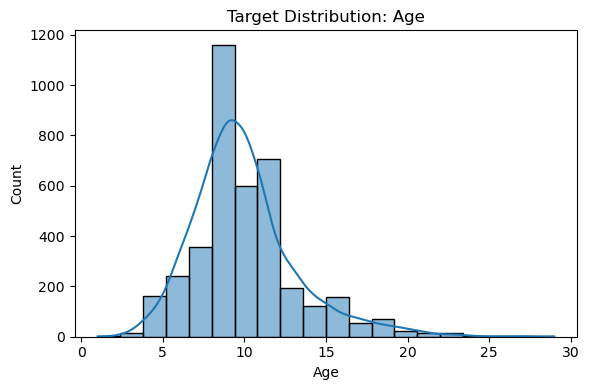

Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
Sex_I                bool
Sex_M                bool
dtype: object


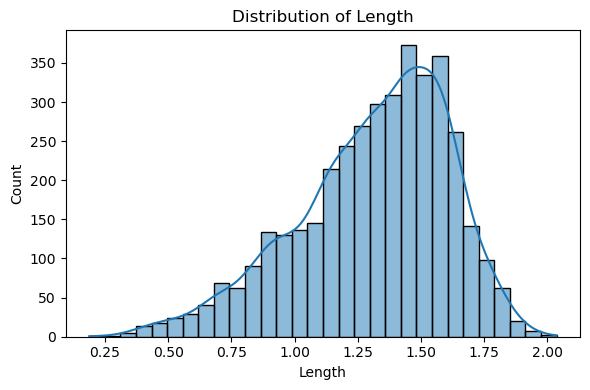

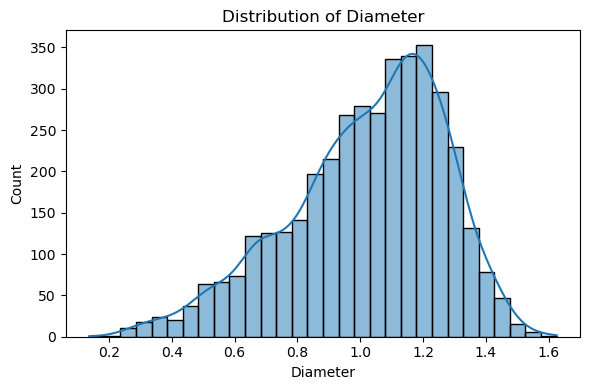

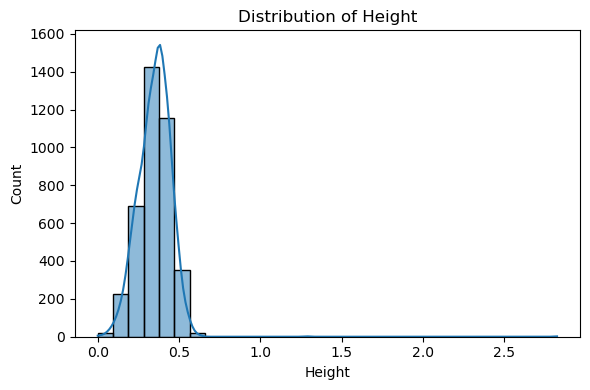

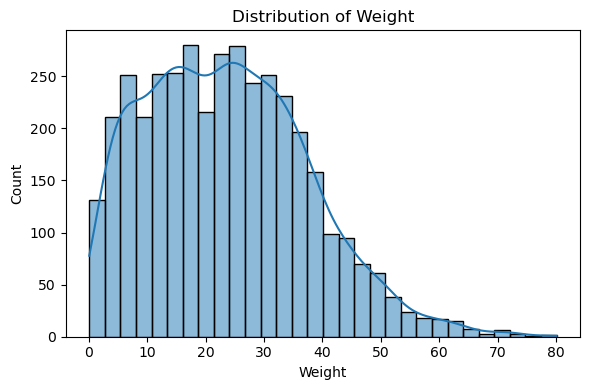

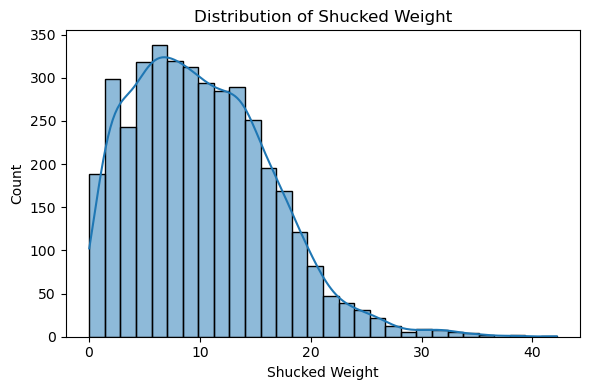

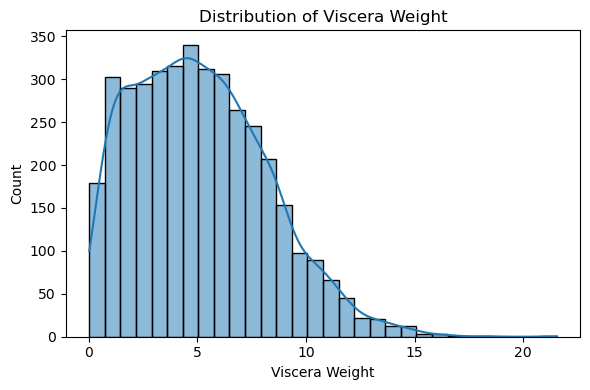

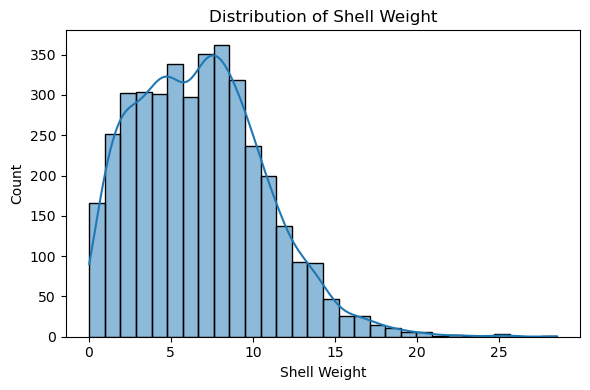

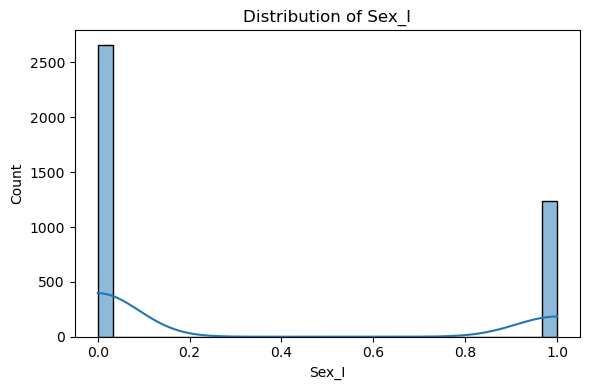

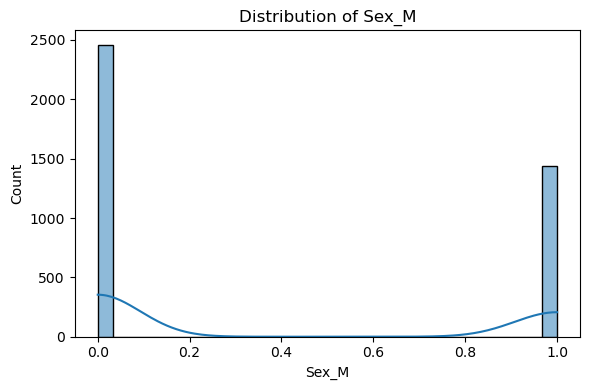

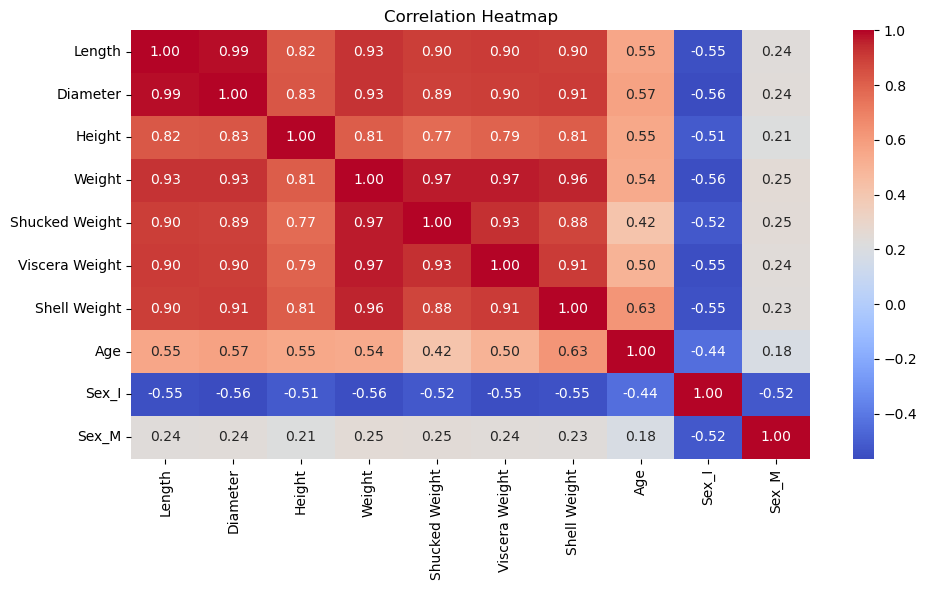

               Model  CV MAE  CV RMSE  CV R2
4                SVR   1.509    2.205  0.539
2      Random Forest   1.565    2.216  0.535
0  Linear Regression   1.603    2.235  0.526
5     Bayesian Ridge   1.603    2.235  0.526
3            XGBoost   1.642    2.333  0.484
1      Decision Tree   2.128    3.107  0.083
               Model  Test MAE  Test RMSE  Test R2
2      Random Forest     1.502      2.105    0.539
0  Linear Regression     1.501      2.154    0.517
5     Bayesian Ridge     1.503      2.157    0.516
4                SVR     1.442      2.161    0.514
3            XGBoost     1.573      2.184    0.504
1      Decision Tree     1.940      2.826    0.169


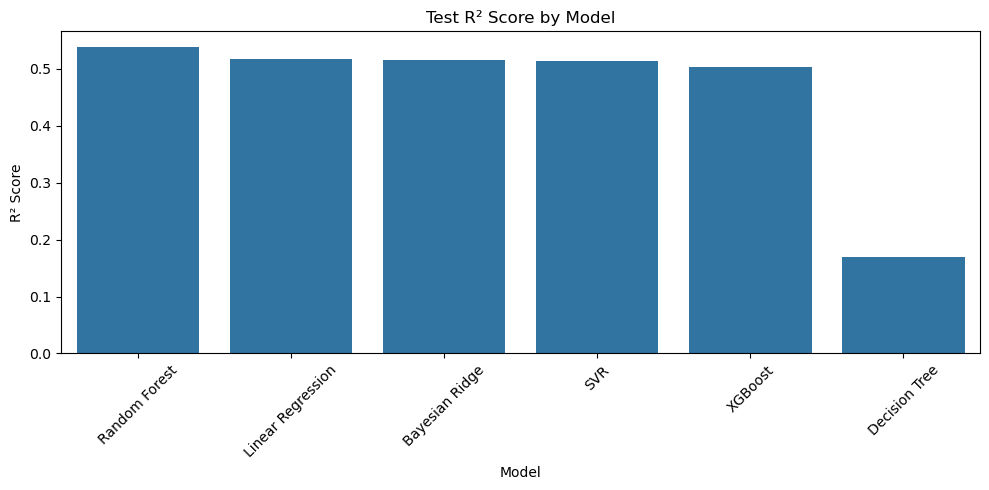

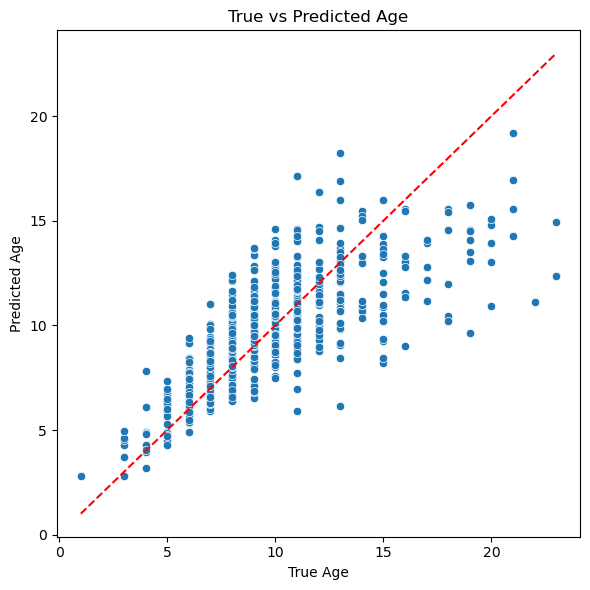

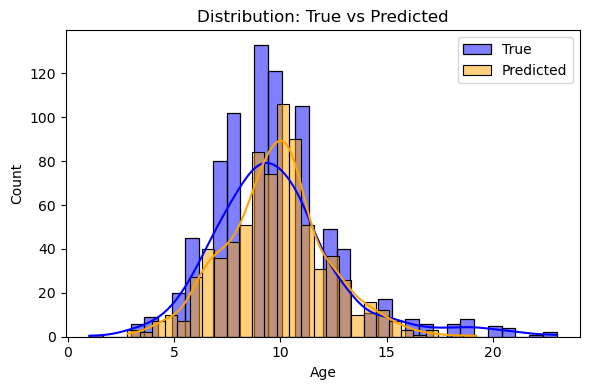

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn import metrics

#1
df = pd.read_csv("CrabAgePrediction.csv")
print(df.info())
print(df.describe())
print(df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")

plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Target Distribution: Age")
plt.tight_layout()
plt.show()

#2
df = pd.get_dummies(df, columns=["Sex"], drop_first=True)
print(df.dtypes)

#3
for col in df.drop("Age", axis=1).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

#4
X = df.drop("Age", axis=1)
y = df["Age"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#5
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "SVR": SVR(),
    "Bayesian Ridge": BayesianRidge()
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(name, model):
    mae = -cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring="neg_mean_absolute_error").mean()
    rmse = np.sqrt(-cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring="neg_mean_squared_error").mean())
    r2 = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring="r2").mean()
    return [name, round(mae, 3), round(rmse, 3), round(r2, 3)]

cv_results = [evaluate_model(name, model) for name, model in models.items()]
cv_results_df = pd.DataFrame(cv_results, columns=["Model", "CV MAE", "CV RMSE", "CV R2"])
print(cv_results_df.sort_values("CV R2", ascending=False))

#dodatkovo
test_results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    test_results.append([name, round(mae, 3), round(rmse, 3), round(r2, 3)])

test_results_df = pd.DataFrame(test_results, columns=["Model", "Test MAE", "Test RMSE", "Test R2"])
print(test_results_df.sort_values("Test R2", ascending=False))

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Test R2", data=test_results_df.sort_values("Test R2", ascending=False))
plt.title("Test R² Score by Model")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train_scaled, y_train)
y_pred_final = best_model.predict(X_test_scaled)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_final)
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.title("True vs Predicted Age")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(y_test, color='blue', label='True', kde=True)
sns.histplot(y_pred_final, color='orange', label='Predicted', kde=True)
plt.title("Distribution: True vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()


1. Розподіл Age — показує, як часто зустрічаються значення віку у вибірці.

2. Розподіл Length — відображає частотність довжин тіла крабів.

3. Розподіл Diameter — показує, як змінюється діаметр серед усіх зразків.

4. Розподіл Height — демонструє висоту крабів, із видимими викидами.

5. Розподіл Weight — ілюструє загальну вагу, з перекосом у бік менших значень.

6. Розподіл Shucked Weight — показує вагу м’яса краба після очищення.

7.Розподіл Viscera Weight — відображає вагу внутрішніх органів.

8 .Розподіл Shell Weight — ілюструє розподіл ваги панцира.

9. Розподіл Sex_I — кількість інтерсексів у вибірці (0 або 1).

10. Розподіл Sex_M — частка самців у даних.

11. Кореляційна матриця — показує, як пов’язані між собою всі ознаки та вік.

12.Barplot Test R² Score by Model — порівнює точність різних моделей на тестовій вибірці.

13. True vs Predicted Age — графік відповідності між справжнім і передбаченим віком.

14. Distribution True vs Predicted — порівнює розподіли справжніх та передбачених значень віку.




